## News dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [4]:
# import data
dir= 'csv/news/'

mle_lm_path  = dir+'run_best_mle_TB-tag-eval_lm_score.csv'
mle_rlm_path = dir+'run_best_mle_TB-tag-eval_rlm_score.csv'

seqgan_mix_beta0_mti0_lm_path  = dir+'run_seqgan_mix_beta0_mti0_TB-tag-eval_lm_score.csv'
seqgan_mix_beta0_mti0_rlm_path = dir+'run_seqgan_mix_beta0_mti0_TB-tag-eval_rlm_score.csv'

seqgan_lm_beta0_mti0_lm_path  = dir+'run_seqgan_lm_beta0_mti0_TB-tag-eval_lm_score.csv'
seqgan_lm_beta0_mti0_rlm_path = dir+'run_seqgan_lm_beta0_mti0_TB-tag-eval_rlm_score.csv'

seqgan_mix_beta0_mti1_lm_path  = dir+'run_seqgan_mix_beta0_mti1_TB-tag-eval_lm_score.csv'
seqgan_mix_beta0_mti1_rlm_path = dir+'run_seqgan_mix_beta0_mti1_TB-tag-eval_rlm_score.csv'

stepgan_lm_beta0_mti1_lm_path  = dir+'run_stepgan_lm_beta0_mti1_TB-tag-eval_lm_score.csv'
stepgan_lm_beta0_mti1_rlm_path = dir+'run_stepgan_lm_beta0_mti1_TB-tag-eval_rlm_score.csv'

gan_lm_beta1_mti0_lm_path  = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta1_mti0_rlm_path = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_rlm_score.csv'



In [5]:
mle_lm = pd.read_csv(mle_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_rlm_path).drop_duplicates('Step')

seqgan_mix_beta0_mti0_lm  = pd.read_csv(seqgan_mix_beta0_mti0_lm_path).drop_duplicates('Step')
seqgan_mix_beta0_mti0_rlm = pd.read_csv(seqgan_mix_beta0_mti0_rlm_path).drop_duplicates('Step')

seqgan_lm_beta0_mti0_lm  = pd.read_csv(seqgan_lm_beta0_mti0_lm_path).drop_duplicates('Step')
seqgan_lm_beta0_mti0_rlm = pd.read_csv(seqgan_lm_beta0_mti0_rlm_path).drop_duplicates('Step')

seqgan_mix_beta0_mti1_lm  = pd.read_csv(seqgan_mix_beta0_mti1_lm_path).drop_duplicates('Step')
seqgan_mix_beta0_mti1_rlm = pd.read_csv(seqgan_mix_beta0_mti1_rlm_path).drop_duplicates('Step')

stepgan_lm_beta0_mti1_lm  = pd.read_csv(stepgan_lm_beta0_mti1_lm_path).drop_duplicates('Step')
stepgan_lm_beta0_mti1_rlm = pd.read_csv(stepgan_lm_beta0_mti1_rlm_path).drop_duplicates('Step')

gan_lm_beta1_mti0_lm  = pd.read_csv(gan_lm_beta1_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta1_mti0_rlm = pd.read_csv(gan_lm_beta1_mti0_rlm_path).drop_duplicates('Step')


### show graphs

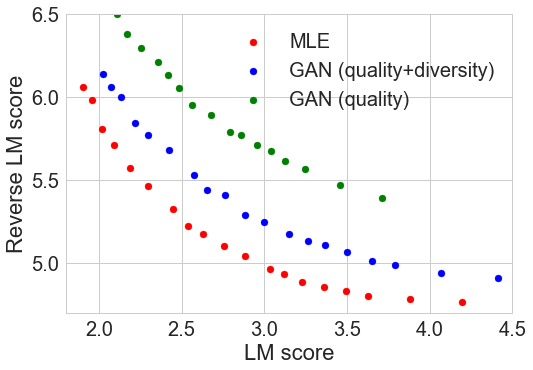

In [27]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(seqgan_mix_beta0_mti0_lm.Value, \
            seqgan_mix_beta0_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)')

plt.scatter(seqgan_lm_beta0_mti0_lm.Value, \
            seqgan_lm_beta0_mti0_rlm.Value, \
            c='g',
            label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.8, 4.5, 4.7, 6.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/news_lm_rlm_temperature_mti0.png')
plt.show()


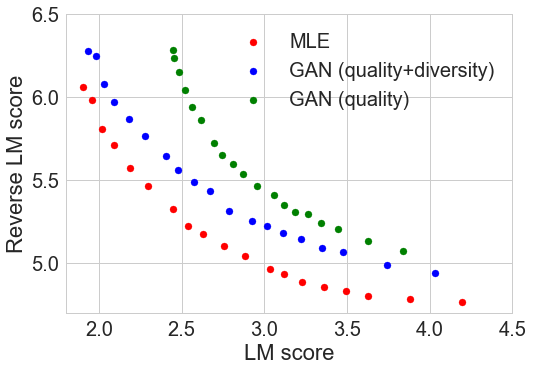

In [28]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(seqgan_mix_beta0_mti1_lm.Value, \
            seqgan_mix_beta0_mti1_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)')

plt.scatter(stepgan_lm_beta0_mti1_lm.Value, \
            stepgan_lm_beta0_mti1_rlm.Value, \
            c='g',
            label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.8, 4.5, 4.7, 6.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/news_lm_rlm_temperature_mti1.png')
plt.show()

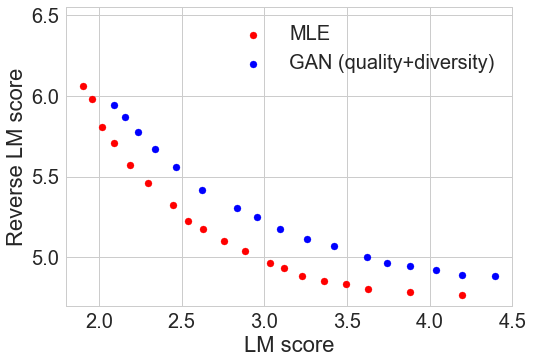

In [29]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(gan_lm_beta1_mti0_lm.Value, \
            gan_lm_beta1_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)')


#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.8, 4.5, 4.7, 6.55])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/news_lm_rlm_temperature_beta1.png')
plt.show()

## COCO dataset

In [50]:
# import data
dir= 'csv/coco/'

mle_lm_path  = dir+'run_best_mle_TB-tag-eval_lm_score.csv'
mle_rlm_path = dir+'run_best_mle_TB-tag-eval_rlm_score.csv'

gan_mix_beta0_mti0_lm_path  = dir+'run_gan_mix_beta0_mti0_TB-tag-eval_lm_score.csv'
gan_mix_beta0_mti0_rlm_path = dir+'run_gan_mix_beta0_mti0_TB-tag-eval_rlm_score.csv'

gan_lm_beta0_mti0_lm_path  = dir+'run_gan_lm_beta0_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta0_mti0_rlm_path = dir+'run_gan_lm_beta0_mti0_TB-tag-eval_rlm_score.csv'

gan_mix_beta0_mti1_lm_path  = dir+'run_gan_mix_beta0_mti1_TB-tag-eval_lm_score.csv'
gan_mix_beta0_mti1_rlm_path = dir+'run_gan_mix_beta0_mti1_TB-tag-eval_rlm_score.csv'

gan_lm_beta0_mti1_lm_path  = dir+'run_gan_lm_beta0_mti1_TB-tag-eval_lm_score.csv'
gan_lm_beta0_mti1_rlm_path = dir+'run_gan_lm_beta0_mti1_TB-tag-eval_rlm_score.csv'


gan_mix_beta1_mti0_lm_path  = dir+'run_gan_mix_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_mix_beta1_mti0_rlm_path = dir+'run_gan_mix_beta1_mti0_TB-tag-eval_rlm_score.csv'

gan_lm_beta1_mti0_lm_path  = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta1_mti0_rlm_path = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_rlm_score.csv'




In [51]:
mle_lm = pd.read_csv(mle_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_rlm_path).drop_duplicates('Step')

gan_mix_beta0_mti0_lm  = pd.read_csv(gan_mix_beta0_mti0_lm_path).drop_duplicates('Step')
gan_mix_beta0_mti0_rlm = pd.read_csv(gan_mix_beta0_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta0_mti0_lm  = pd.read_csv(gan_lm_beta0_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta0_mti0_rlm = pd.read_csv(gan_lm_beta0_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_mix_beta0_mti1_lm  = pd.read_csv(gan_mix_beta0_mti1_lm_path).drop_duplicates('Step')
gan_mix_beta0_mti1_rlm = pd.read_csv(gan_mix_beta0_mti1_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta0_mti1_lm  = pd.read_csv(gan_lm_beta0_mti1_lm_path).drop_duplicates('Step')
gan_lm_beta0_mti1_rlm = pd.read_csv(gan_lm_beta0_mti1_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_mix_beta1_mti0_lm  = pd.read_csv(gan_mix_beta1_mti0_lm_path).drop_duplicates('Step')
gan_mix_beta1_mti0_rlm = pd.read_csv(gan_mix_beta1_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta1_mti0_lm  = pd.read_csv(gan_lm_beta1_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta1_mti0_rlm = pd.read_csv(gan_lm_beta1_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')


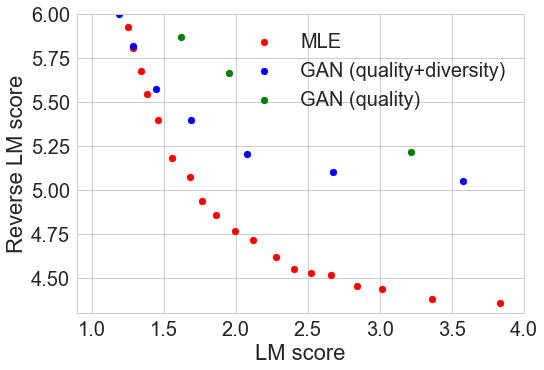

In [71]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(gan_mix_beta0_mti0_lm.Value, \
            gan_mix_beta0_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)')

plt.scatter(gan_lm_beta0_mti0_lm.Value, \
            gan_lm_beta0_mti0_rlm.Value, \
            c='g',
            label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/coco_lm_rlm_temperature_mti0.png')
plt.show()

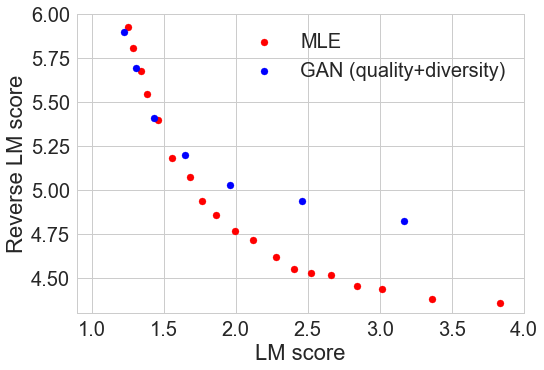

In [73]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(gan_mix_beta0_mti1_lm.Value, \
            gan_mix_beta0_mti1_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)')

# plt.scatter(gan_lm_beta0_mti1_lm.Value, \
#             gan_lm_beta0_mti1_rlm.Value, \
#             c='g',
#             label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/coco_lm_rlm_temperature_mti1.png')
plt.show()

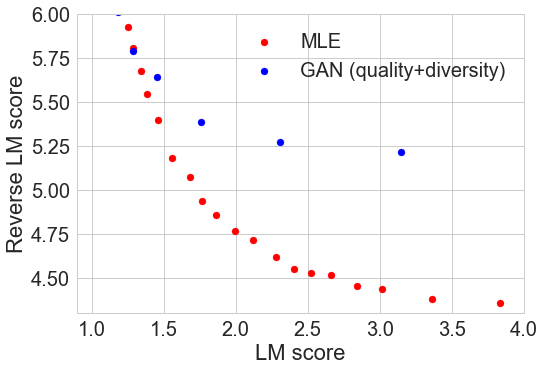

In [72]:
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE')

plt.scatter(gan_mix_beta1_mti0_lm.Value, \
            gan_mix_beta1_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)')

# plt.scatter(gan_lm_beta1_mti0_lm.Value, \
#             gan_lm_beta1_mti0_rlm.Value, \
#             c='g',
#             label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend()
plt.savefig('figs/coco_lm_rlm_temperature_beta1.png')
plt.show()

## argument for quality/diversity w.r.t temperatures 

In [35]:
model1_lm = mle_lm.Value
model1_rlm = mle_rlm.Value

model2_lm = model1_lm
model2_rlm = model1_rlm

model2_lm = [ x-1 for x in model2_lm ]
model1_rlm = [ x-0.6 for x in model1_rlm ]



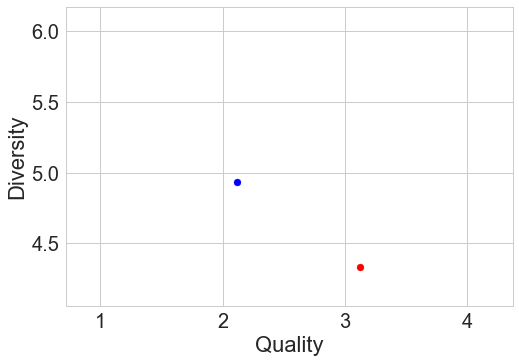

In [40]:
i = 6

plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=0)

plt.scatter(model1_lm[i], 
            model1_rlm[i], 
            c='r',
            alpha=1)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=0)

plt.scatter(model2_lm[i], 
            model2_rlm[i], 
            c='b',
            alpha=1)


#plt.colorbar(sc)
plt.xlabel('Quality')
plt.ylabel('Diversity')

plt.savefig('figs/bad_eval.png')
plt.show()

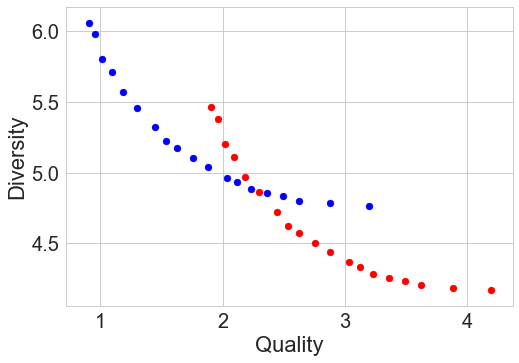

In [42]:

plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=1)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=1)



#plt.colorbar(sc)
plt.xlabel('Quality')
plt.ylabel('Diversity')

plt.savefig('figs/good_eval.png')
plt.show()

## entropy_plot

In [2]:
data = pd.read_csv('results_entropy_alpha_HBLEU1.csv')
# data

In [3]:
temperature = data[data.model.map(lambda x: 'alphat' in x)]



In [4]:
temperature.color = -temperature.model.map(lambda x: float(x.split('alphat')[1].split('_')[0]))

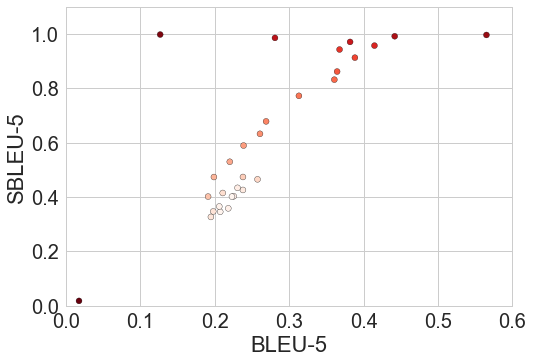

In [8]:
cm = plt.cm.get_cmap('Reds')

sc = plt.scatter(temperature.BLEU.values, \
                 temperature.SBLEU.values, \
                 c=temperature.color.values, vmin=-1, vmax=0, s=35, cmap=cm, edgecolors='k')
#plt.colorbar(sc)
plt.xlabel('BLEU-5')
plt.ylabel('SBLEU-5')
plt.axis([0, 0.6, 0, 1.1])
plt.savefig('alpha_temperature_reg.png')
plt.show()


In [6]:
entropy = data[data.model.map(lambda x: 'mew' in x)]
entropy.color_temp = entropy.model.map(lambda x: x.split('mew')[1].split('_')[0])
entropy.color = entropy.color_temp.rank().values


In [7]:
cm = plt.cm.get_cmap('Reds')
z = xy
sc = plt.scatter(entropy.BLEU.values, entropy.SBLEU.values, c=entropy.color, vmin=0, vmax=30, s=35, cmap=cm, edgecolors='k')
#plt.colorbar(sc)
plt.xlabel('BLEU-5')
plt.ylabel('SBLEU-5')
plt.axis([0, 0.6, 0, 1.1])
plt.savefig('alpha_entropy_reg.png')
plt.show()


NameError: name 'xy' is not defined